In [1]:
from datetime import datetime
HOMEPATH = "/home/ubuntu/fastai/"
DATA_HOME_DIR = HOMEPATH + "data/cifar-10/"
DATA_WORKING = DATA_HOME_DIR + "sample/"
DATA_WORKING_RESULTS = DATA_WORKING + "results/"

print ("DATA_WORKING      :", DATA_WORKING)
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)

('DATA_WORKING      :', '/home/ubuntu/fastai/data/cifar-10/sample/')
('DATA_WORKING_RESULTS:', '/home/ubuntu/fastai/data/cifar-10/sample/results/')


In [2]:
from keras import backend as K
from keras.models import load_model 
import os

print("----------------")
def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("theano")

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


----------------


In [3]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
# Rather than importing everything manually, we'll make things easy
#   and load them all in utils.py, and just import them from there.
%matplotlib inline
import utils; reload(utils)
from utils import *
from utils import plots, get_batches, plot_confusion_matrix, get_data

('os.getcwd:', '/home/ubuntu/fastai')


In [4]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import pandas as pd
import scipy
from random import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import cPickle as pickle


('os.getcwd:', '/home/ubuntu/fastai')


In [5]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

from vgg16 import Vgg16

In [6]:
#path = HOMEPATH + "data/dogscats/sample/"
path = DATA_HOME_DIR 
#path = DATA_HOME_DIR + "sample/"
train_path = path + 'train/'
test_path = path + 'test/'
testUnknown_path = path + 'test/unknown/'
valid_path = path + 'valid/'
model_path = path + 'models/'
sample_path = path + 'sample/'
sampleTrain_path = path + 'sample/train/'
sampleTest_path = path + 'sample/test/'
sampleValid_path = path + 'sample/valid/'
sampleResults_path = path + 'sample/results/'
sampleTestUnknown_path = path + 'sample/test/unknown/'

categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


batch_size=64

In [7]:
def dirFileList(dir_path):
    return [name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]


In [8]:
dirList = [train_path, valid_path, sampleTrain_path, sampleValid_path]

for dir_path in dirList:
    for category in categories:
        print ("# of files in", dir_path+category, ":", len(dirFileList(dir_path+category)))


# of files in /home/ubuntu/fastai/data/cifar-10/train/airplane : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/automobile : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/bird : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/cat : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/deer : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/dog : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/frog : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/horse : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/ship : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/truck : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/valid/airplane : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/automobile : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/bird : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/cat : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/deer : 

In [9]:
vgg = Vgg16()
model = vgg.model
print ("type(vgg):", type(vgg))
print ("type(model):", type(model))

type(vgg): <type 'instance'>
type(model): <class 'keras.models.Sequential'>


In [10]:
def showLayersInfo(model):
    print ("Number of layers : ", len(model.layers))
    for layer in model.layers:
        print (type(layer))

In [11]:
showLayersInfo(model)

Number of layers :  38
<class 'keras.layers.core.Lambda'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolutio

In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [13]:
print("DATA_WORKING:", DATA_WORKING)

DATA_WORKING: /home/ubuntu/fastai/data/cifar-10/sample/


In [14]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
startTime= datetime.now()
print ("startTime:", startTime)
val_batches = get_batches(DATA_WORKING+'valid/', shuffle=False, batch_size=1)
timeElapsed=datetime.now()-startTime
print('val_batches: Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))

print ("\n")

startTime= datetime.now()
print ("startTime:", startTime)
batches     = get_batches(DATA_WORKING+'train/', shuffle=False, batch_size=1)
timeElapsed=datetime.now()-startTime
print('batches : Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-09 07:21:19.844516
Found 2000 images belonging to 10 classes.
val_batches: Time elapsed (hh:mm:ss.ms) 0:00:00.044807


startTime: 2017-12-09 07:21:19.889857
Found 8000 images belonging to 10 classes.
batches : Time elapsed (hh:mm:ss.ms) 0:00:00.171197


In [15]:
print ("val_batches:", type(val_batches))
print ("batches:", type(batches))

val_batches: <class 'keras.preprocessing.image.DirectoryIterator'>
batches: <class 'keras.preprocessing.image.DirectoryIterator'>


In [16]:
import bcolz
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname):
    print ("load_array:fname:", fname)
    return bcolz.open(fname)[:]

In [17]:
print ("DATA_WORKING:", DATA_WORKING)
#utils.get_data
startTime= datetime.now()
print ("startTime:", startTime)

val_data = get_data(DATA_WORKING+'valid')

print ("val_data:", type(val_data), val_data.shape)

timeElapsed=datetime.now()-startTime
print('val_data:Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


DATA_WORKING: /home/ubuntu/fastai/data/cifar-10/sample/
startTime: 2017-12-09 07:21:20.085501
Found 2000 images belonging to 10 classes.
val_data: <type 'numpy.ndarray'> (2000, 3, 224, 224)
val_data:Time elapsed (hh:mm:ss.ms) 0:00:16.402158


In [18]:
print ("DATA_WORKING:", DATA_WORKING)
startTime= datetime.now()
print ("startTime:", startTime)

trn_data = get_data(DATA_WORKING+'train')
print ("trn_data:", type(trn_data), trn_data.shape)

timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


DATA_WORKING: /home/ubuntu/fastai/data/cifar-10/sample/
startTime: 2017-12-09 07:21:36.496893
Found 8000 images belonging to 10 classes.
trn_data: <type 'numpy.ndarray'> (8000, 3, 224, 224)
Time elapsed (hh:mm:ss.ms) 0:01:05.574561


In [19]:
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)

DATA_WORKING_RESULTS: /home/ubuntu/fastai/data/cifar-10/sample/results/


In [20]:
#utils.save_array uses bcolz. very small filesize generated.
save_array(DATA_WORKING_RESULTS+'train_data.bc', trn_data)
save_array(DATA_WORKING_RESULTS+'valid_data.bc', val_data)

In [21]:
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)
print (DATA_WORKING_RESULTS+'train_data.bc')
trn_data = load_array(DATA_WORKING_RESULTS+'train_data.bc')
val_data = load_array(DATA_WORKING_RESULTS+'valid_data.bc')
print ("trn_data:", type(trn_data), trn_data.shape)#should return trn_data: <type 'numpy.ndarray'> (8000, 3, 224, 224)
print ("val_data:", type(val_data), val_data.shape)#should return val_data: <type 'numpy.ndarray'> (2000, 3, 224, 224)


DATA_WORKING_RESULTS: /home/ubuntu/fastai/data/cifar-10/sample/results/
/home/ubuntu/fastai/data/cifar-10/sample/results/train_data.bc
load_array:fname: /home/ubuntu/fastai/data/cifar-10/sample/results/train_data.bc
load_array:fname: /home/ubuntu/fastai/data/cifar-10/sample/results/valid_data.bc
trn_data: <type 'numpy.ndarray'> (8000, 3, 224, 224)
val_data: <type 'numpy.ndarray'> (2000, 3, 224, 224)


In [22]:
#Keras returns *classes* as a single column, so we convert to one hot encoding
def onehot(x): 
    return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [23]:
val_classes = val_batches.classes
trn_classes = batches.classes
print ("val_classes:", type(val_classes), val_classes.shape)
print("val_classes[0:10]:", val_classes[0:10])
print ("trn_classes:", type(trn_classes), trn_classes.shape)
print("trn_classes[0:10]:", trn_classes[0:10])
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)
print ("after onehot conversion.")
print ("val_labels:", val_labels[0])
print ("trn_labels:", trn_labels[0])

val_classes: <type 'numpy.ndarray'> (2000,)
val_classes[0:10]: [0 0 0 0 0 0 0 0 0 0]
trn_classes: <type 'numpy.ndarray'> (8000,)
trn_classes[0:10]: [0 0 0 0 0 0 0 0 0 0]
after onehot conversion.
val_labels: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
trn_labels: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [24]:
print ("start")
startTime= datetime.now()
print ("startTime:", startTime)

trn_features = model.predict(trn_data, batch_size=batch_size)

timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))


start
startTime: 2017-12-09 07:22:46.687017
Time elpased (hh:mm:ss.ms) 0:03:25.645419


In [25]:
startTime= datetime.now()
print ("startTime:", startTime)

val_features = model.predict(val_data, batch_size=batch_size)

timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-09 07:26:12.342316
Time elpased (hh:mm:ss.ms) 0:00:50.608274


In [26]:
print ("trn_features:", trn_features.shape)
print ("val_features:", val_features.shape)

trn_features: (8000, 1000)
val_features: (2000, 1000)


In [27]:
print ("DATA_WORKING_RESULTS:",DATA_WORKING_RESULTS)

DATA_WORKING_RESULTS: /home/ubuntu/fastai/data/cifar-10/sample/results/


In [28]:
save_array(DATA_WORKING_RESULTS+'train_lastlayer_features.bc', trn_features)
save_array(DATA_WORKING_RESULTS+'valid_lastlayer_features.bc', val_features)

In [29]:
trn_features = load_array(DATA_WORKING_RESULTS+'train_lastlayer_features.bc')
val_features = load_array(DATA_WORKING_RESULTS+'valid_lastlayer_features.bc')

load_array:fname: /home/ubuntu/fastai/data/cifar-10/sample/results/train_lastlayer_features.bc
load_array:fname: /home/ubuntu/fastai/data/cifar-10/sample/results/valid_lastlayer_features.bc


In [30]:
print ("trn_features:", type(trn_features), trn_features.shape)
print ("val_features:", type(val_features), val_features.shape)

trn_features: <type 'numpy.ndarray'> (8000, 1000)
val_features: <type 'numpy.ndarray'> (2000, 1000)


In [31]:
# 1000 inputs, since trn_features.shape[1]=1000, and 10 outputs, for # of categories
startTime= datetime.now()
print ("startTime:", startTime)


lm = Sequential([ Dense(10, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-09 07:27:03.105917
Time elapsed (hh:mm:ss.ms) 0:00:00.011663


In [32]:
batch_size=64

In [33]:
print (type(categories), len(categories))

<type 'list'> 10


In [34]:
startTime= datetime.now()
print ("startTime:", startTime)

lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size, 
       validation_data=(val_features, val_labels))

timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-09 07:27:03.138048
Train on 8000 samples, validate on 2000 samples
Epoch 1/3
8000/8000 [==============================] - 0s - loss: 1.8699 - acc: 0.3399 - val_loss: 1.7212 - val_acc: 0.3970
Epoch 2/3
8000/8000 [==============================] - 0s - loss: 1.6578 - acc: 0.4199 - val_loss: 1.6242 - val_acc: 0.4390
Epoch 3/3
8000/8000 [==============================] - 0s - loss: 1.5825 - acc: 0.4555 - val_loss: 1.5731 - val_acc: 0.4515
Time elapsed (hh:mm:ss.ms) 0:00:01.395519


In [35]:
print (type(lm))
print (lm.summary())

<class 'keras.models.Sequential'>
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 10)            10010       dense_input_1[0][0]              
Total params: 10,010
Trainable params: 10,010
Non-trainable params: 0
____________________________________________________________________________________________________
None


In [36]:
startTime= datetime.now()
print ("startTime:", startTime)

preds = lm.predict_classes(val_features, batch_size=batch_size)

timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))

startTime: 2017-12-09 07:27:04.628726
  64/2000 [..............................] - ETA: 0sTime elapsed (hh:mm:ss.ms) 0:00:00.045945


In [37]:
print (type(preds), preds.shape)
print ("preds[0:10]:", preds[0:10])

<type 'numpy.ndarray'> (2000,)
preds[0:10]: [0 0 8 0 1 0 0 0 0 0]


In [38]:
startTime= datetime.now()
print ("startTime:", startTime)

#probabilities of each category results in numpy array with column for each category.
probs = lm.predict_proba(val_features, batch_size=batch_size)#[:,0]

timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))

print ("probs:", type(probs), probs.shape)
print (probs[0,])
print ( ["%.4f" % v for v in probs[0,]])

startTime: 2017-12-09 07:27:04.693447
  64/2000 [..............................] - ETA: 0sTime elapsed (hh:mm:ss.ms) 0:00:00.015358
probs: <type 'numpy.ndarray'> (2000, 10)
[  6.5417e-01   7.4647e-02   2.9050e-02   4.2381e-05   7.5155e-05   1.6956e-06   1.0976e-06
   3.3803e-03   1.7962e-01   5.9019e-02]
['0.6542', '0.0746', '0.0290', '0.0000', '0.0001', '0.0000', '0.0000', '0.0034', '0.1796', '0.0590']


In [39]:
filenames = val_batches.filenames
print ("filenames:", type(filenames), len(filenames))
print (filenames[0:10])

filenames: <type 'list'> 2000
['airplane/28450.png', 'airplane/35856.png', 'airplane/26724.png', 'airplane/16514.png', 'airplane/36622.png', 'airplane/12430.png', 'airplane/14586.png', 'airplane/21106.png', 'airplane/29040.png', 'airplane/43910.png']


In [40]:
# Number of images to view for each visualization task
n_view = 4


In [41]:
def classesFromFilenames(filenames):
    #returns text versions of categories from filenames.
    #requires filenames in format of 'category-text-form/123456.png'
    #strips out the category-text-form prior to '/'
    classes = []
    #print ("classesFromFilenames:idx:", idx)
    for i in range(0, len(filenames)):
        pos = filenames[i].find('/')
        #print ("pos:", pos, filenames[i][0:pos])
        classes.append(filenames[i][0:pos])
    return classes

In [42]:
def classesFromPreds(preds, categories):
    #returns text versions of categories
    categs = []
    for pred in preds:
        #print("pred:", pred, categories[pred])
        categs.append(categories[pred])
    return categs

In [43]:
def plots_idx(path, idx, titles=None):
    #titles = numpy array idx rows x 10 columns, need to select highest prob from each row.
    maxProb = []
    for i in range(0, titles.shape[0]):
        #print (titles[i,], type(titles[i,]))
        #print (np.argmax(titles[i,]))
        maxProb.append(titles[i,np.argmax(titles[i,])])
    plots([image.load_img(path + filenames[i]) for i in idx], titles=maxProb)

In [44]:
categsFromFileNames = classesFromFilenames(filenames)
print("categsFromFileNames:", len(categsFromFileNames), categsFromFileNames[0:4])
categsFromPreds = classesFromPreds(preds, categories)
print("categsFromPreds:", len(categsFromPreds), categsFromPreds[0:4])


categsFromFileNames: 2000 ['airplane', 'airplane', 'airplane', 'airplane']
categsFromPreds: 2000 ['airplane', 'airplane', 'ship', 'airplane']


In [45]:
def plotSamples(matchIndex):
    #numpy.random.permutation
    idx = permutation(matchIndex)[:n_view]
    print ("idx:", idx)
    for i in idx:
        print(filenames[i])

    #print (classesFromFilenames(idx, filenames))
    #print ("probs[idx].shape:", probs[idx].shape)
    plots_idx(DATA_WORKING+'valid/', idx, probs[idx])
    #print ("idx:", idx)
    print ("actual from filenames:", [categsFromFileNames[i] for i in idx])
    print ("predicted            :",     [categsFromPreds[i] for i in idx])
    #print ("probs[idx[0],]:", probs[idx[0],])

# of correctly predicted : matchIndex: 903
idx: [ 794  990   63 1265]
cat/35450.png
deer/16968.png
airplane/17466.png
frog/14907.png
actual from filenames: ['cat', 'deer', 'airplane', 'frog']
predicted            : ['cat', 'deer', 'airplane', 'frog']


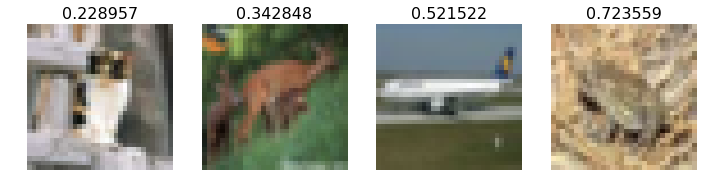

In [46]:
#select correctly predicted.
matchIndex = []
for i in range(0,len(categsFromFileNames)):
    if categsFromFileNames[i]==categsFromPreds[i]:
        matchIndex.append(i)
print ("# of correctly predicted : matchIndex:", len(matchIndex))
plotSamples(matchIndex)

# of incorrectly predicted : matchIndex: 1097
idx: [ 874 1584  742 1222]
deer/45914.png
horse/12846.png
cat/6596.png
frog/18622.png
actual from filenames: ['deer', 'horse', 'cat', 'frog']
predicted            : ['dog', 'truck', 'frog', 'deer']


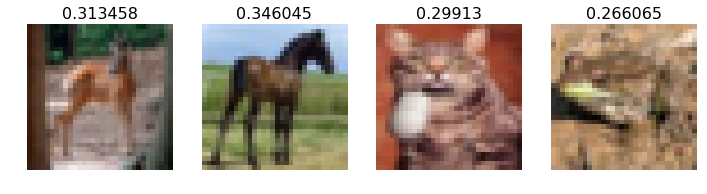

In [47]:
#select incorrectly predicted.
matchIndex = []
for i in range(0,len(categsFromFileNames)):
    if categsFromFileNames[i]!=categsFromPreds[i]:
        matchIndex.append(i)
print ("# of incorrectly predicted : matchIndex:", len(matchIndex))
plotSamples(matchIndex)

In [48]:
cm = confusion_matrix(val_classes, preds)

In [ ]:
print ("type(val_batches.class_indices):", type(val_batches.class_indices))

[[131  12   7   4   1   1   9   5  18  12]
 [ 15 131   1   8   2   3   6  10   5  19]
 [ 27   4  52  27  25   2  37  19   5   2]
 [  4  15  10  84  12  14  40  10   5   6]
 [ 12   7   7  18  85   2  42  23   1   3]
 [  4   5  10  74  20  32  28  22   3   2]
 [  4   5   7  22  21   0 128   8   3   2]
 [  4  12   6  26  16   1  12  97   3  23]
 [ 63  23   5   8   4   0   1   8  75  13]
 [ 15  53   2  13   4   0   4  13   8  88]]


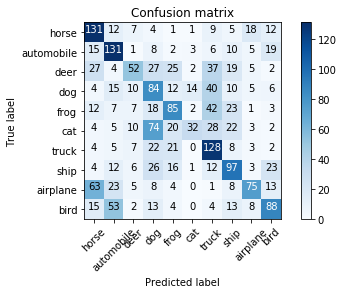

In [49]:
#plt.figure(figsize=(12,12)) #does not affect size, method is inside utils

plot_confusion_matrix(cm, val_batches.class_indices)

In [50]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [54]:
print ("before pop, # of layers:", len(model.layers))
if len(model.layers)==38:
    print ("# of layers == 38., poping top layer.")
    model.pop()
else:
    print ("# of layers not == 38.")
print ("after pop, # of layers:", len(model.layers))
for layer in model.layers: layer.trainable=False

before pop, # of layers: 38
# of layers == 38., poping top layer.
after pop, # of layers: 37


In [55]:
print (type(vgg.model))
#not really useful, here for reference only
#for layer in model.layers:
#    print(layer.name, layer.inbound_nodes, layer.outbound_nodes)

<class 'keras.models.Sequential'>


In [56]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [57]:
model.add(Dense(10, activation='softmax'))#NB: Dense requires 10 because 10 categories.

In [58]:
print ("after adding dense layer, # of layers:", len(model.layers))

after adding dense layer, # of layers: 38


In [59]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [60]:
gen=image.ImageDataGenerator()
print ("gen:", type(gen))
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
#https://keras.io/preprocessing/image/
#flow(x, y): Takes numpy data & label arrays, 
#and generates batches of augmented/normalized data. 
#Yields batches indefinitely, in an infinite loop.

val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)

print ("batches:", type(batches))
print ("val_batches:", type(val_batches))

gen: <class 'keras.preprocessing.image.ImageDataGenerator'>
batches: <class 'keras.preprocessing.image.NumpyArrayIterator'>
val_batches: <class 'keras.preprocessing.image.NumpyArrayIterator'>


In [61]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, 
                        samples_per_epoch=batches.n, 
                        nb_epoch=nb_epoch, 
                        validation_data=val_batches, 
                        nb_val_samples=val_batches.n)

In [62]:
opt = RMSprop(lr=0.1)
#https://keras.io/optimizers/#rmsprop
#This optimizer is usually a good choice for recurrent neural networks.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
startTime= datetime.now()
fit_model(model, batches, val_batches, nb_epoch=2)
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))

Epoch 1/2
8000/8000 [==============================] - 251s - loss: 14.4244 - acc: 0.0995 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/2
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Time elpased (hh:mm:ss.ms) 0:08:31.395924


In [64]:
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)

DATA_WORKING_RESULTS: /home/ubuntu/fastai/data/cifar-10/sample/results/


In [1]:
model.save_weights(DATA_WORKING_RESULTS+'finetune1.h5')

NameError: name 'model' is not defined

In [66]:
#model.load_weights(DATA_WORKING_RESULTS+'finetune1.h5')

In [67]:
model.evaluate(val_data, val_labels)

2000/2000 [==============================] - 51s    


[14.50628586959839, 0.10000000000000001]

In [68]:
print ("type(model):", type(model))

type(model): <class 'keras.models.Sequential'>


In [69]:
preds = model.predict_classes(val_data, batch_size=batch_size)
probs = model.predict_proba(val_data, batch_size=batch_size)

2000/2000 [==============================] - 50s    


In [70]:
print("preds:", preds.shape)
print("probs:", probs.shape)

preds: (2000,)
probs: (2000, 10)


In [71]:
probs[:8,]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [72]:
cm = confusion_matrix(val_classes, preds)

In [73]:
print ("type(val_batches):", type(val_batches))

type(val_batches): <class 'keras.preprocessing.image.NumpyArrayIterator'>


In [74]:
#recall - val_batches was generated from loading files. possibly need to initialize again?
#val_batches = get_batches(DATA_WORKING+'valid/', shuffle=False, batch_size=1)
#plot_confusion_matrix(cm, val_batches.class_indices)
#AttributeError: 'NumpyArrayIterator' object has no attribute 'class_indices'

In [75]:
for layer in model.layers:
    print (type(layer))

<class 'keras.layers.core.Lambda'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.lay

In [76]:
layers = model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
print (type(first_dense_idx), first_dense_idx)
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]: 
    layer.trainable=True

<type 'int'> 33


In [77]:
type(K)
#recall from above: from keras import backend as K

module

In [78]:
K.set_value(opt.lr, 0.01)
#https://keras.io/backend/
#keras.backend.set_value(x, value)
#https://www.tensorflow.org/api_docs/python/tf/keras/backend/set_value

    
fit_model(model, batches, val_batches, 3)

Epoch 1/3
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/3
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/3
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [79]:
model.save_weights(DATA_WORKING_RESULTS+'finetune2_.h5')

In [80]:
for layer in layers[12:]: layer.trainable=True
K.set_value(opt.lr, 0.001)

In [81]:
fit_model(model, batches, val_batches, 4)

Epoch 1/4
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/4
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/4
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/4
8000/8000 [==============================] - 251s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [82]:
model.save_weights(DATA_WORKING_RESULTS+'finetune3_.h5')

In [83]:
from keras.models import load_model #move this to top when run complete.
model.save(DATA_WORKING_RESULTS+'CIFAR-10_part2_final_model_.h5')

In [86]:
def save_object(obj, filename):
    filename = DATA_WORKING_RESULTS+filename
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
    print ("method save_object loaded with DATA_WORKING_RESULTS=", DATA_WORKING_RESULTS)
# sample usage
#save_object(company1, 'company1.pkl')

In [87]:
save_object(model, 'CIFAR-10_part2_final_model.pkl')

RuntimeError: maximum recursion depth exceeded while calling a Python object

In [88]:
pickle_model = pickle.load( open( DATA_WORKING_RESULTS+'CIFAR-10_part2_final_model.pkl', "rb" ) )

EOFError: 

In [89]:
print(type(pickle_model))

NameError: name 'pickle_model' is not defined

In [93]:
val_features = load_array(DATA_WORKING_RESULTS+'valid_lastlayer_features.bc')
print ("val_features:", type(val_features), val_features.shape)

load_array:fname: /home/ubuntu/fastai/data/cifar-10/sample/results/valid_lastlayer_features.bc
val_features: <type 'numpy.ndarray'> (2000, 1000)


In [95]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [90]:
startTime= datetime.now()
print ("startTime:", startTime)

preds = model.predict_classes(val_features, batch_size=batch_size)

timeElapsed=datetime.now()-startTime
print('Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))

startTime: 2017-12-09 08:32:12.797768


ValueError: Error when checking : expected lambda_input_1 to have 4 dimensions, but got array with shape (2000, 1000)